In [2]:
import os
os.chdir('/workspace/my_cyclegan/metric/')

In [4]:
!python calc_metrics.py --input_path /all_data/Scannet_filtered/testA/depth/\
--pred_path /workspace/results/cycle_B_scannet/test/A2B/depth/\
--target_path /all_data/Scannet_filtered/testB/depth/

start
100%|████████████████████████████████████| 10380/10380 [01:02<00:00, 165.06it/s]
{'rmse': 120.14327911279597, 'mae': 69.45881724921725, 'rmse_h': 492.2103589205685, 'rmse_d': 92.94205841459807, 'psnr': 38.6053615983727, 'ssim': 0.9846192878647133}


In [1]:
!python calc_metrics.py --input_path /all_data/Scannet_filtered/testA/depth/\
--pred_path /workspace/results/ugatit/test/A2B/depth/\
--target_path /all_data/Scannet_filtered/testB/depth/

start
100%|████████████████████████████████████| 10380/10380 [01:03<00:00, 162.55it/s]
{'rmse': 247.74237892539298, 'mae': 218.31314495461527, 'rmse_h': 508.7622582427856, 'rmse_d': 235.15702777213727, 'psnr': 31.999685624268555, 'ssim': 0.964793255318989}


In [1]:
import matplotlib.pyplot as plt
import imageio
import os
import numpy as np
from glob import glob

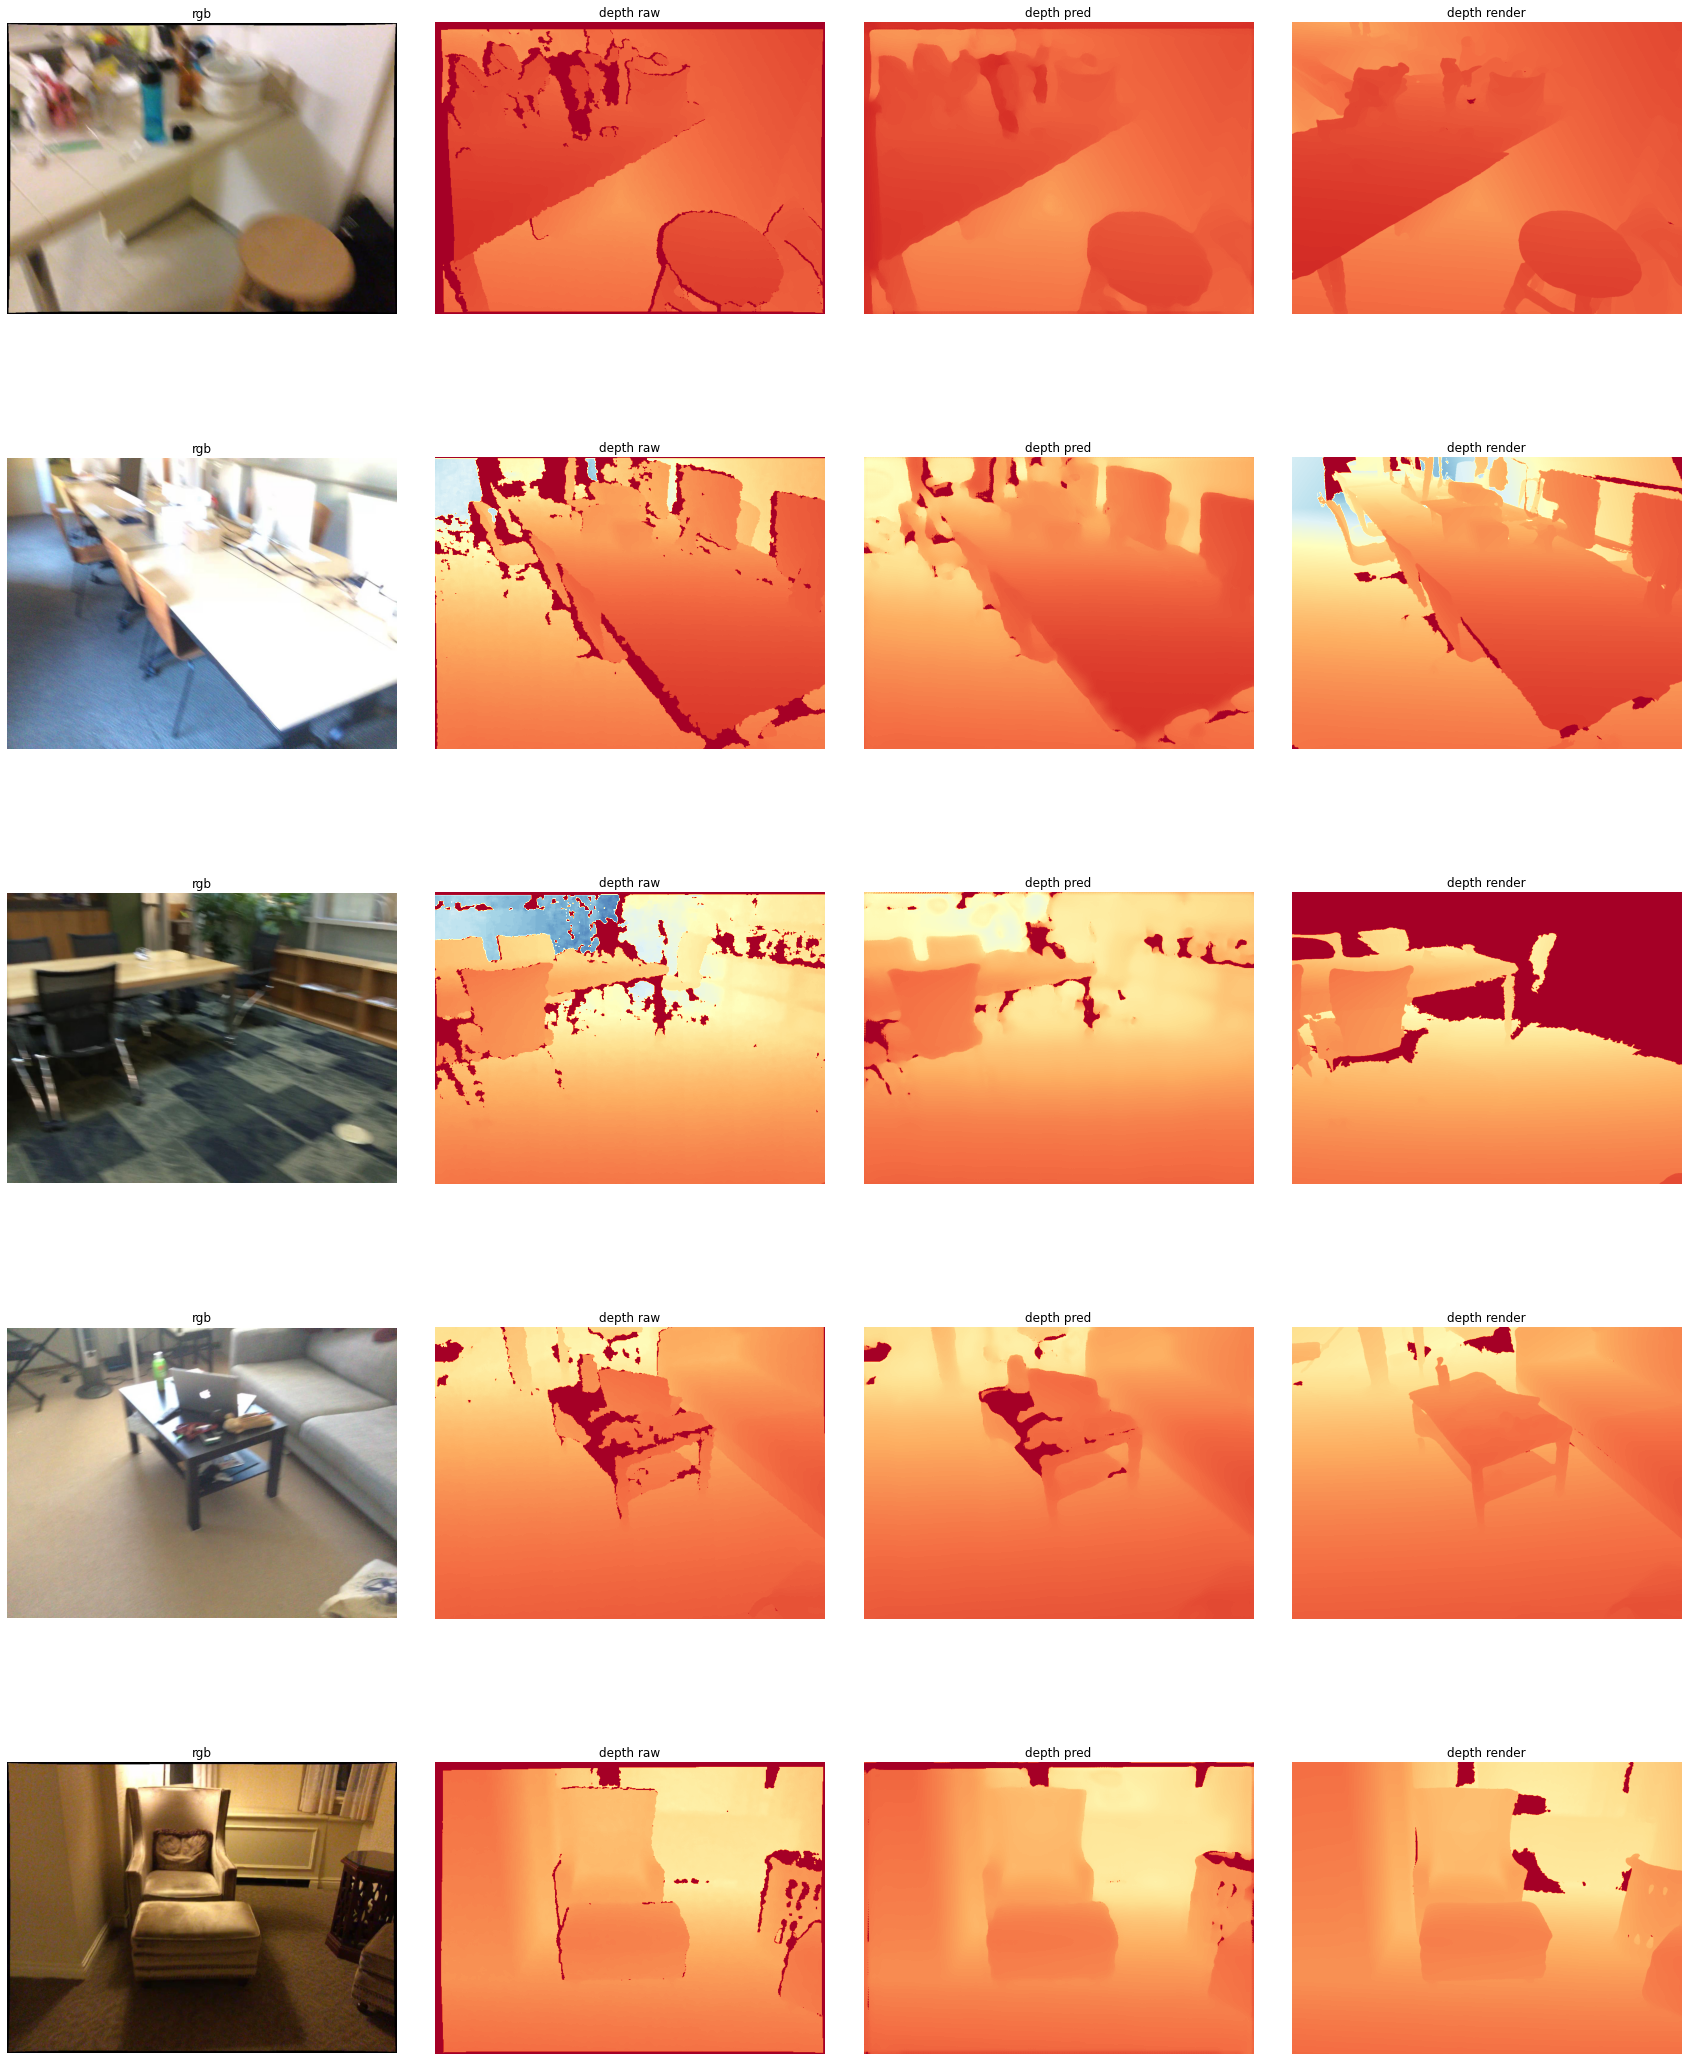

In [2]:
path_raw = '/workspace/scene_vis/valA/depth/'
path_render = '/workspace/scene_vis/valB/depth/'
path_img = '/workspace/scene_vis/valA/img/'
path_pred = '/workspace/results/cycle_B_scannet/val/A2B/depth/'
raw = sorted(glob(os.path.join(path_raw,'*.png')))
render = sorted(glob(os.path.join(path_render,'*.png')))
pred = sorted(glob(os.path.join(path_pred,'*.png')))
img = sorted(glob(os.path.join(path_img,'*.jpg')))

fig, axes = plt.subplots(5,4, figsize=(30,40))
fig.subplots_adjust(hspace=0.0, wspace=0.1)
for i,ax in enumerate(axes.flatten()):
    ax.axis('off')
for i in range(5):
    axes[i,0].set_title('rgb')
    axes[i,1].set_title('depth raw')
    axes[i,2].set_title('depth pred')
    axes[i,3].set_title('depth render')
    axes[i,0].imshow(imageio.imread(img[i]))
    axes[i,1].imshow(imageio.imread(raw[i]),cmap=plt.get_cmap('RdYlBu'), vmin=0, vmax=8000)
    axes[i,2].imshow(imageio.imread(pred[i]),cmap=plt.get_cmap('RdYlBu'), vmin=0, vmax=8000)
    axes[i,3].imshow(imageio.imread(render[i]),cmap=plt.get_cmap('RdYlBu'), vmin=0, vmax=8000)

In [9]:
vis_scene = ['scene0584_00_1000', 'scene0515_00_1150','scene0622_00_950','scene0645_00_700', 'scene0623_01_1250']

In [10]:
path_raw = '/all_data/Scannet_all_data/raw/'
path_render = '/all_data/Scannet_all_data/render/'
path_img = '/all_data/Scannet_all_data/img/'
img = sorted(os.listdir(path_img))

In [11]:
from shutil import copyfile
import os

In [15]:
for f in img:
    name = f.split('.')[0]
    if name in vis_scene:
        print('here')
        copyfile(os.path.join(path_raw, name+'.png'), os.path.join('/workspace/scene_vis/testA/depth/',name+'.png'))
        copyfile(os.path.join(path_render, name+'.png'), os.path.join('/workspace/scene_vis/testB/depth/',name+'.png'))
        copyfile(os.path.join(path_img, name+'.jpg'), os.path.join('/workspace/scene_vis/testA/img/',name+'.jpg'))
        copyfile(os.path.join(path_img, name+'.jpg'), os.path.join('/workspace/scene_vis/testB/img/',name+'.jpg'))
        

here
here
here
here
here


In [3]:
def get_normal(depth):
    norm = np.zeros(( depth.shape[0], depth.shape[1], 3))
    dzdx = np.gradient(depth, 1, axis=0)
    dzdy = np.gradient(depth, 1, axis=1)
    norm[ :, :, 0] = -dzdx
    norm[ :, :, 1] = -dzdy
    norm[ :, :, 2] = np.ones_like(depth)
    n = np.linalg.norm(norm, axis = 2, ord=2, keepdims=True)
    norm = norm/(n + 1e-15)
    return norm

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

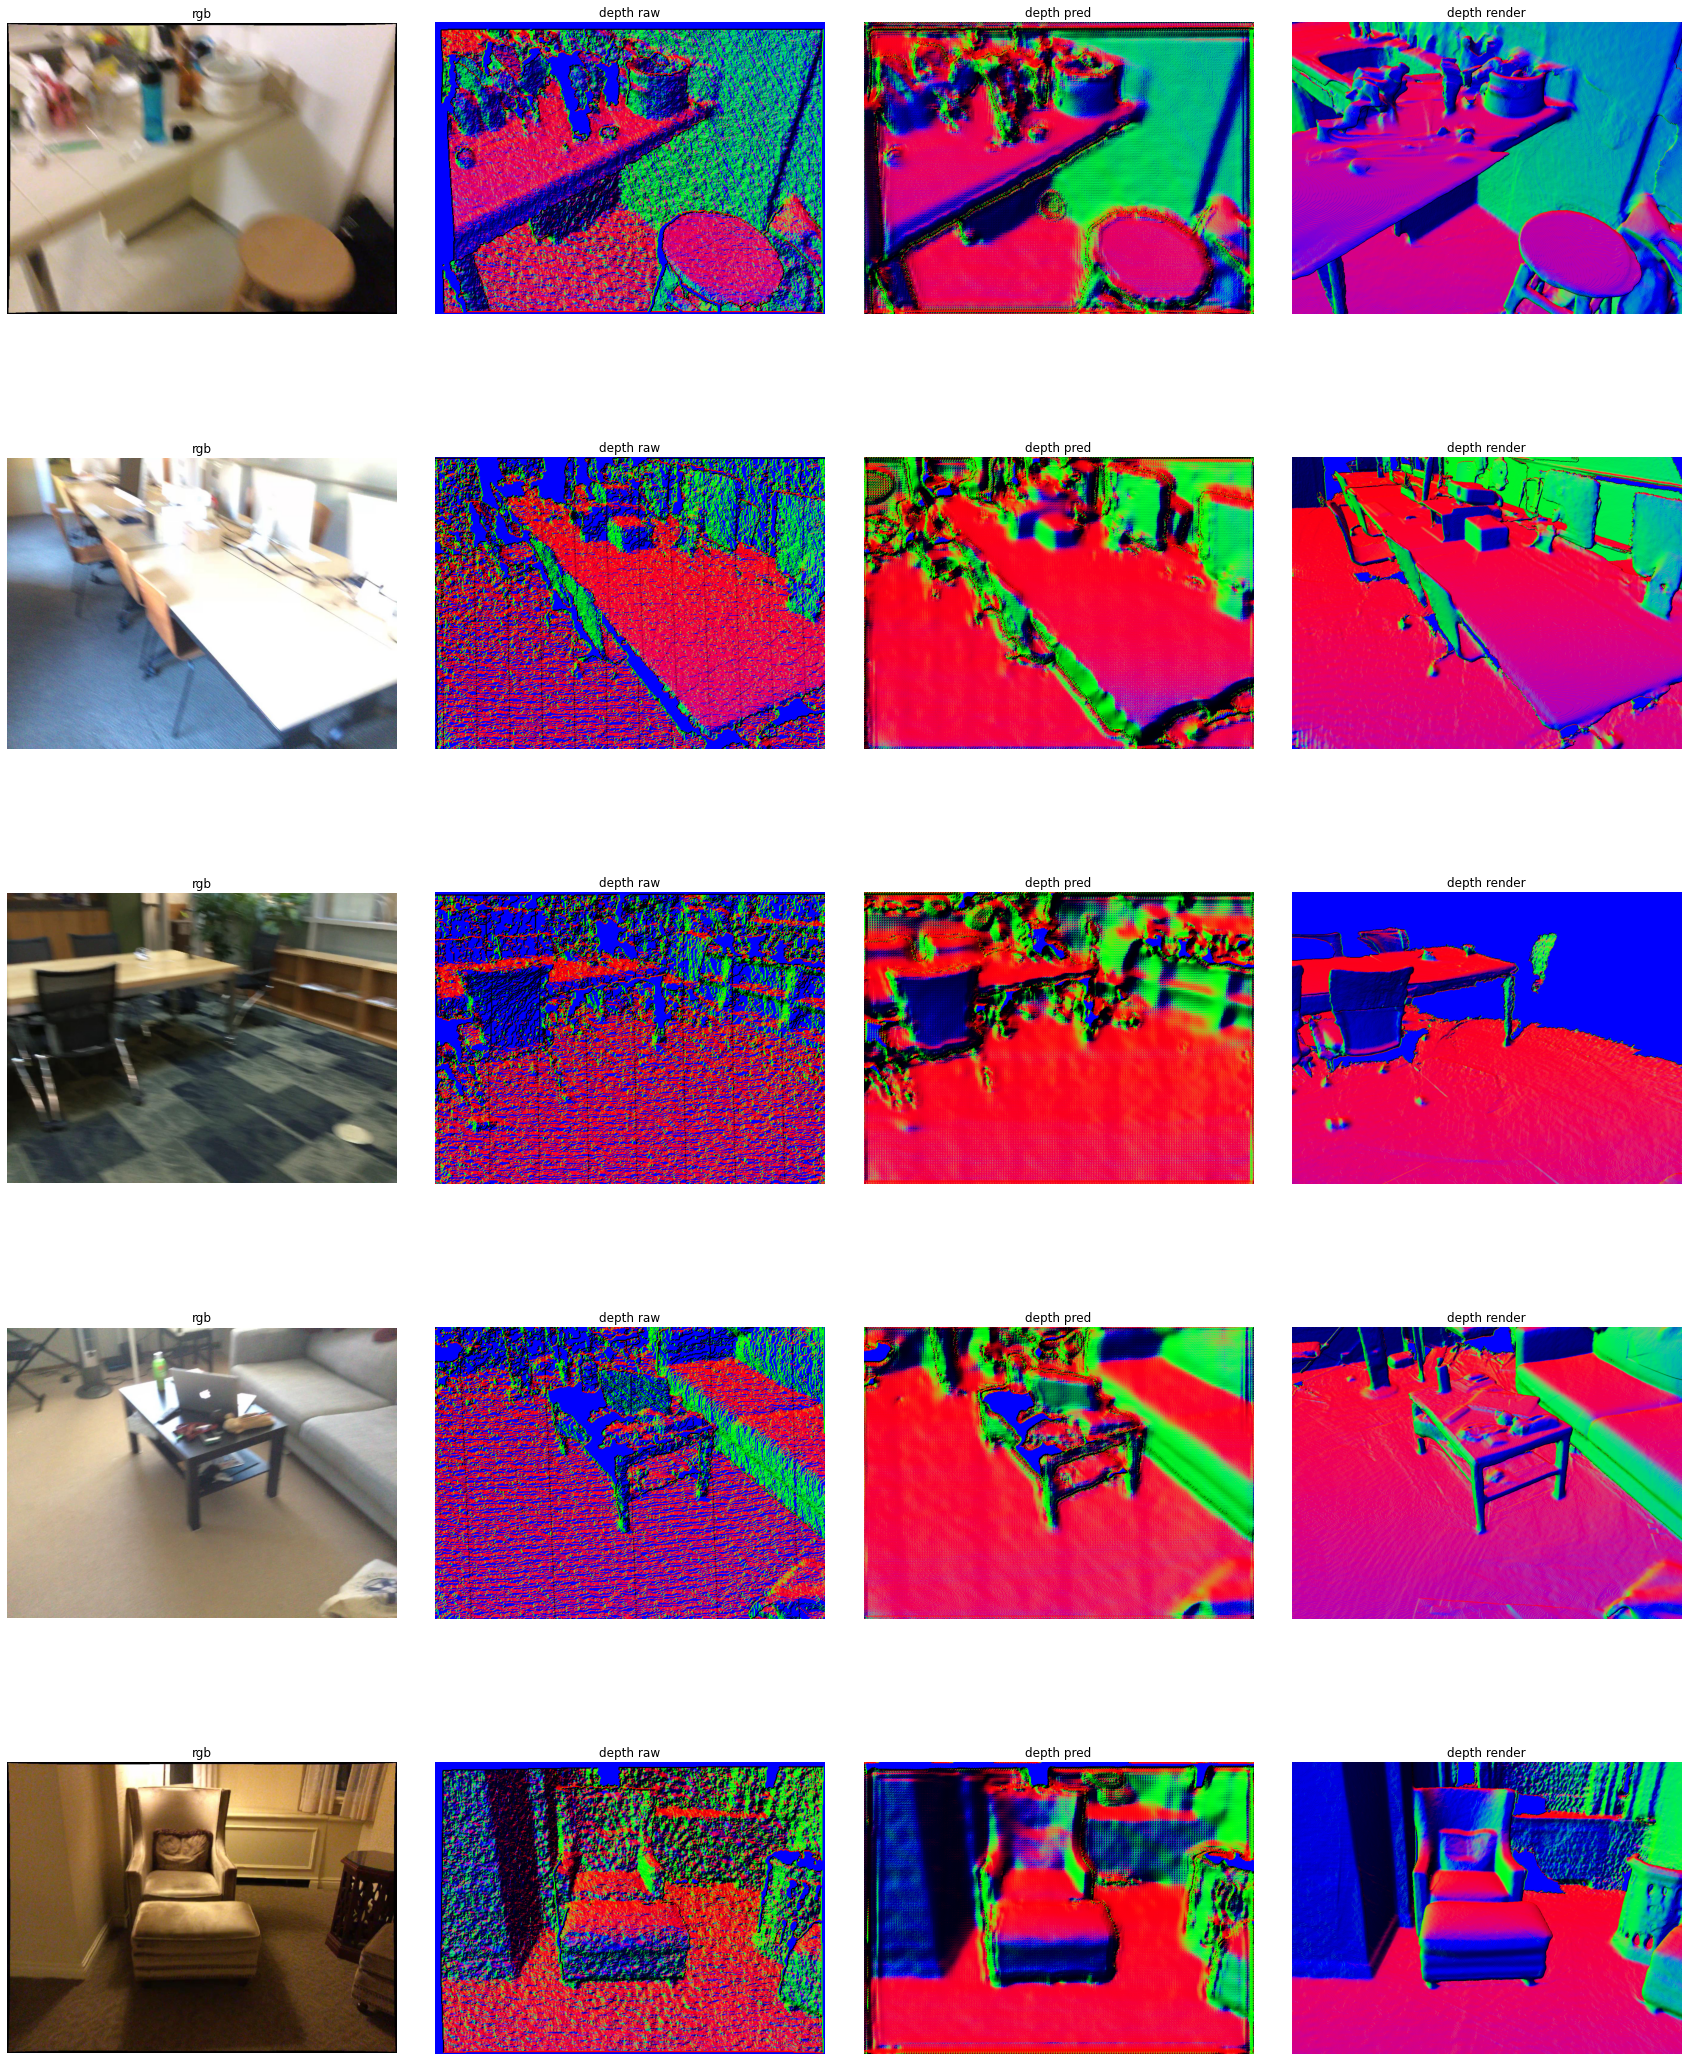

In [6]:
fig, axes = plt.subplots(5,4, figsize=(30,40))
fig.subplots_adjust(hspace=0.0, wspace=0.1)
for i,ax in enumerate(axes.flatten()):
    ax.axis('off')
for i in range(5):
    axes[i,0].set_title('rgb')
    axes[i,1].set_title('depth raw')
    axes[i,2].set_title('depth pred')
    axes[i,3].set_title('depth render')
    axes[i,0].imshow(imageio.imread(img[i]))
    axes[i,1].imshow(get_normal(imageio.imread(raw[i])))
    axes[i,2].imshow(get_normal(imageio.imread(pred[i])))
    axes[i,3].imshow(get_normal(imageio.imread(render[i])))

In [18]:
!python fid_kid.py  /workspace/results/max/cycle_B/test/A2B/ /all_data/Scannet_filtered/testB/ --batch-size 50 --gpu 1 --mmd-var

start
loading network Tensorflow
Network loaded
compute statistic A
100%|█████████████████████████████████████████| 208/208 [01:08<00:00,  3.05it/s]
compute statistic B
100%|█████████████████████████████████████████| 208/208 [01:11<00:00,  2.92it/s]
compute FID
FID:  29.62166218771796
MMD: 100%|█████████████████████████| 50/50 [00:13<00:00,  3.67it/s, mean=0.0147]
mean MMD^2 estimate: 1.4719505140713895
std MMD^2 estimate: 0.0008865415728018759
MMD^2 estimates:
[0.01456185 0.01503379 0.01448186 0.01514272 0.01333263 0.01466866
 0.01490709 0.01370897 0.01478659 0.01571269 0.01529045 0.01385495
 0.01508523 0.01418363 0.01368535 0.0151058  0.01444215 0.01502514
 0.01464301 0.01342552 0.0143904  0.01482912 0.01510059 0.01485338
 0.01366118 0.01740106 0.01475237 0.01357291 0.01640912 0.01511938
 0.0145042  0.01692432 0.01409718 0.01310484 0.01530119 0.01472808
 0.01373091 0.01309347 0.01406001 0.01428108 0.01524683 0.01504093
 0.01476945 0.01510843 0.01590046 0.01372041 0.01573417 0.0150201

## Scannet and Scannet

In [2]:
!python fid_kid.py /all_data/hdd/un_depth/semi/sample/trainA/first/ /all_data/hdd/un_depth/semi/sample/trainA/second/ --gpu 0 --mmd-var

start
loading network Tensorflow
Network loaded
compute statistic A
100%|█████████████████████████████████████████| 100/100 [01:46<00:00,  1.06s/it]
compute statistic B
100%|█████████████████████████████████████████| 100/100 [01:44<00:00,  1.05s/it]
compute FID
FID:  1.64784676533597
MMD: 100%|███████████████████████| 50/50 [00:36<00:00,  1.39it/s, mean=0.000329]
mean MMD^2 estimate: 0.03292656644636516
std MMD^2 estimate: 0.00012739957387108123

mean Var[MMD^2] estimate: -1.2539049616547399e-08
std Var[MMD^2] estimate: 1.950943052502324e-09



In [7]:
!python fid_kid.py /all_data/hdd/un_depth/semi/sample/trainA/first/ /all_data/hdd/un_depth/semi/sample/trainA/second/ --gpu 0 --mmd-var --use_normals

start
loading network Tensorflow
Network loaded
compute statistic A
100%|█████████████████████████████████████████| 100/100 [01:47<00:00,  1.08s/it]
compute statistic B
100%|█████████████████████████████████████████| 100/100 [01:46<00:00,  1.06s/it]
compute FID
FID:  1.503700521381731
MMD: 100%|███████████████████████| 50/50 [00:37<00:00,  1.35it/s, mean=0.000354]
mean MMD^2 estimate: 0.0353850988925668
std MMD^2 estimate: 0.00011583642778028629

mean Var[MMD^2] estimate: 1.1022238823077164e-07
std Var[MMD^2] estimate: 1.210947166005386e-09



### Interiornet and Interiornet

In [3]:
!python fid_kid.py /all_data/hdd/un_depth/semi/sample/trainB/first/ /all_data/hdd/un_depth/semi/sample/trainB/second/ --gpu 0 --mmd-var

start
loading network Tensorflow
Network loaded
compute statistic A
100%|█████████████████████████████████████████| 100/100 [01:38<00:00,  1.02it/s]
compute statistic B
100%|█████████████████████████████████████████| 100/100 [01:38<00:00,  1.01it/s]
compute FID
FID:  1.516115513419976
MMD: 100%|███████████████████████| 50/50 [00:38<00:00,  1.29it/s, mean=0.000153]
mean MMD^2 estimate: 0.015317512032099854
std MMD^2 estimate: 7.4926485778605e-05

mean Var[MMD^2] estimate: 5.3722077618728985e-08
std Var[MMD^2] estimate: 8.542666746561539e-10



In [3]:
!python fid_kid.py /all_data/hdd/un_depth/semi/sample/trainB/first/ /all_data/hdd/un_depth/semi/sample/trainB/second/ --gpu 0 --mmd-var --use_normals

start
loading network Tensorflow
Network loaded
compute statistic A
100%|█████████████████████████████████████████| 100/100 [01:42<00:00,  1.03s/it]
compute statistic B
100%|█████████████████████████████████████████| 100/100 [01:39<00:00,  1.00it/s]
compute FID
FID:  1.8055581019249445
MMD: 100%|███████████████████████| 50/50 [00:32<00:00,  1.56it/s, mean=0.000173]
mean MMD^2 estimate: 0.017329281143702246
std MMD^2 estimate: 7.236001028220651e-05

mean Var[MMD^2] estimate: -1.5425290313793563e-07
std Var[MMD^2] estimate: 5.57156692286313e-10



### Scannet and Interiornet

In [4]:
!python fid_kid.py /all_data/hdd/un_depth/semi/sample/testA/depth/ /all_data/hdd/un_depth/semi/sample/testB/depth/ --gpu 0 --mmd-var

start
loading network Tensorflow
Network loaded
compute statistic A
100%|█████████████████████████████████████████| 100/100 [01:44<00:00,  1.04s/it]
compute statistic B
100%|█████████████████████████████████████████| 100/100 [01:37<00:00,  1.03it/s]
compute FID
FID:  51.02458070430697
MMD: 100%|█████████████████████████| 50/50 [00:36<00:00,  1.38it/s, mean=0.0559]
mean MMD^2 estimate: 5.589221470230004
std MMD^2 estimate: 0.0012103135120150137

mean Var[MMD^2] estimate: 3.1196214772468985e-05
std Var[MMD^2] estimate: 1.362303974325405e-08



### UGATIT A2B and Interiornet

In [5]:
!python fid_kid.py /all_data/hdd/un_depth/results/max/ugatit/A2B/ /all_data/hdd/un_depth/semi/sample/testB/depth/ --gpu 0 --mmd-var

start
loading network Tensorflow
Network loaded
compute statistic A
100%|█████████████████████████████████████████| 100/100 [01:52<00:00,  1.13s/it]
compute statistic B
100%|█████████████████████████████████████████| 100/100 [01:38<00:00,  1.01it/s]
compute FID
FID:  23.282014834851807
MMD: 100%|█████████████████████████| 50/50 [00:35<00:00,  1.39it/s, mean=0.0216]
mean MMD^2 estimate: 2.1607944565818347
std MMD^2 estimate: 0.0005819080850425271

mean Var[MMD^2] estimate: 1.2477183753495045e-05
std Var[MMD^2] estimate: 7.301935031098395e-09



In [12]:
!python fid_kid.py /all_data/hdd/un_depth/results/max/ugatit/A2B/ /all_data/hdd/un_depth/semi/sample/testB/ --gpu 0 --mmd-var --use_normals

start
loading network Tensorflow
Network loaded
compute statistic A
100%|█████████████████████████████████████████| 100/100 [01:54<00:00,  1.15s/it]
compute statistic B
100%|█████████████████████████████████████████| 100/100 [01:40<00:00,  1.01s/it]
compute FID
FID:  58.494510939463275
MMD: 100%|█████████████████████████| 50/50 [00:31<00:00,  1.56it/s, mean=0.0698]
mean MMD^2 estimate: 6.980858940463218
std MMD^2 estimate: 0.0006592464866750862

mean Var[MMD^2] estimate: 1.1147804195287897e-05
std Var[MMD^2] estimate: 3.81111656266991e-09



### UGATIT B2A and Scannet

In [6]:
!python fid_kid.py /all_data/hdd/un_depth/results/max/ugatit/B2A/ /all_data/hdd/un_depth/semi/sample/testA/depth/ --gpu 0 --mmd-var

start
loading network Tensorflow
Network loaded
compute statistic A
100%|█████████████████████████████████████████| 100/100 [01:51<00:00,  1.12s/it]
compute statistic B
100%|█████████████████████████████████████████| 100/100 [01:56<00:00,  1.16s/it]
compute FID
FID:  21.121604828290103
MMD: 100%|█████████████████████████| 50/50 [00:39<00:00,  1.25it/s, mean=0.0233]
mean MMD^2 estimate: 2.3295363883099256
std MMD^2 estimate: 0.001162622457593278

mean Var[MMD^2] estimate: 3.4050661685095476e-05
std Var[MMD^2] estimate: 2.0338318494469527e-08



### 2 Disc(depth, normals) transpose conv

In [8]:
!python fid_kid.py /all_data/hdd/un_depth/results/max/try_normal_depth_disc_transpose/test/A2B/ /all_data/hdd/un_depth/semi/sample/testB/ --gpu 0,1,2,3 --mmd-var --batch-size 12

start
loading network Tensorflow
Network loaded
compute statistic A
100%|█████████████████████████████████████████| 417/417 [02:34<00:00,  2.69it/s]
compute statistic B
100%|█████████████████████████████████████████| 417/417 [02:15<00:00,  3.07it/s]
compute FID
FID:  28.06240603228882
MMD: 100%|█████████████████████████| 50/50 [00:51<00:00,  1.03s/it, mean=0.0275]
mean MMD^2 estimate: 2.750258315396078
std MMD^2 estimate: 0.0007158164860344174

mean Var[MMD^2] estimate: 1.3092714165133814e-05
std Var[MMD^2] estimate: 9.163980864904201e-09



In [9]:
!python fid_kid.py /all_data/hdd/un_depth/results/max/try_normal_depth_disc_transpose/test/A2B/ /all_data/hdd/un_depth/semi/sample/testB/ --gpu 0,1,2,3 --mmd-var --batch-size 12 --use_normals

start
loading network Tensorflow
Network loaded
compute statistic A
100%|█████████████████████████████████████████| 417/417 [02:32<00:00,  2.73it/s]
compute statistic B
100%|█████████████████████████████████████████| 417/417 [02:10<00:00,  3.20it/s]
compute FID
FID:  58.954593270443965
MMD: 100%|██████████████████████████| 50/50 [00:46<00:00,  1.09it/s, mean=0.072]
mean MMD^2 estimate: 7.199876195728564
std MMD^2 estimate: 0.0005783421613868209

mean Var[MMD^2] estimate: 9.575783716106806e-06
std Var[MMD^2] estimate: 2.8305395462061414e-09



### Check Tanh A2B and InteriorNet

In [15]:
!python fid_kid.py /all_data/hdd/un_depth/results/max/check_tanh/A2B/ /all_data/hdd/un_depth/semi/sample/testB/ --gpu 0 --mmd-var

start
loading network Tensorflow
Network loaded
compute statistic A
100%|█████████████████████████████████████████| 100/100 [01:40<00:00,  1.00s/it]
compute statistic B
100%|█████████████████████████████████████████| 100/100 [01:36<00:00,  1.03it/s]
compute FID
FID:  26.922941570929424
MMD: 100%|█████████████████████████| 50/50 [00:36<00:00,  1.37it/s, mean=0.0261]
mean MMD^2 estimate: 2.6075676670101604
std MMD^2 estimate: 0.000860655790947057

mean Var[MMD^2] estimate: 1.535691429548241e-05
std Var[MMD^2] estimate: 1.0958373614868715e-08



In [2]:
!python fid_kid.py /all_data/hdd/un_depth/results/max/check_tanh/A2B/ /all_data/hdd/un_depth/semi/sample/testB/ --gpu 0 --mmd-var --use_normals

start
loading network Tensorflow
Network loaded
compute statistic A
100%|█████████████████████████████████████████| 100/100 [01:44<00:00,  1.04s/it]
compute statistic B
100%|█████████████████████████████████████████| 100/100 [01:39<00:00,  1.00it/s]
compute FID
FID:  51.932132276169455
MMD: 100%|█████████████████████████| 50/50 [00:40<00:00,  1.23it/s, mean=0.0625]
mean MMD^2 estimate: 6.254144883986229
std MMD^2 estimate: 0.0006596086875438872

mean Var[MMD^2] estimate: 8.8216997389428e-06
std Var[MMD^2] estimate: 3.0273773426699724e-09



### Check Tanh B2A and Scannet

In [8]:
!python fid_kid.py /all_data/hdd/un_depth/results/max/check_tanh/B2A/ /all_data/hdd/un_depth/semi/sample/testA/depth/ --gpu 1 --mmd-var

start
loading network Tensorflow
Network loaded
compute statistic A
100%|█████████████████████████████████████████| 100/100 [01:50<00:00,  1.10s/it]
compute statistic B
100%|█████████████████████████████████████████| 100/100 [01:53<00:00,  1.13s/it]
compute FID
FID:  24.491624566284052
MMD: 100%|█████████████████████████| 50/50 [00:38<00:00,  1.31it/s, mean=0.0225]
mean MMD^2 estimate: 2.2505199950066617
std MMD^2 estimate: 0.0007325312550361643

mean Var[MMD^2] estimate: 1.515402939745167e-05
std Var[MMD^2] estimate: 1.2308585384427013e-08

